In [140]:
path = "/content/final_data.csv"

In [142]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline


In [143]:
data = pd.read_csv(path)

In [144]:
data.head()

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [146]:
colours = data.label.unique()
colours

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [147]:
Xtrain = data[['red','green','blue']]
ytrain = data['label']

In [148]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(Xtrain,ytrain)

RandomForestClassifier()

The type of this input is <class 'numpy.ndarray'>
Shape: (56, 60, 3)


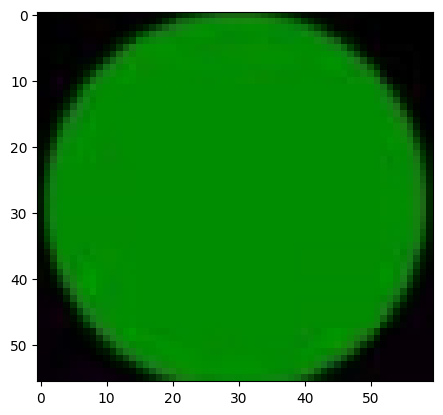

In [149]:
image = cv2.imread('/content/Green.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

In [150]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

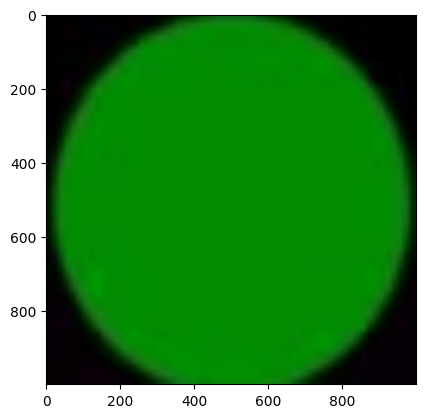

In [151]:
resized_image = cv2.resize(image, (1000, 1000))
plt.imshow(resized_image)

In [152]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [153]:
def get_colors(image, number_of_colors):

    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    return rgb_colors


In [154]:
color_detect = get_colors(image,1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [155]:
pic_colours = np.array(color_detect)
predictions = clf.predict(pic_colours)
predictions[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Green'